In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

## Read the data

In [3]:

import os
from extract_pdf_data import read_pdfs

if not os.path.exists("wef_primary_enrolment.csv"):
    df = read_pdfs('primary education')
    df.to_csv("wef_primary_enrolment.csv", index=False)

In [4]:
from utils import read_wef_file

df = read_wef_file("wef_primary_enrolment.csv")
df.head()

,country,page_number,score,rank,diff,left,right
code,,,,,,,
ALB,Albania,83,0.952,115.0,-4.49,88.53,93.02
DZA,Algeria,85,NaN,NaN,NaN,NaN,NaN
AGO,Angola,87,NaN,NaN,NaN,NaN,NaN
ARG,Argentina,89,NaN,NaN,NaN,NaN,NaN
ARM,Armenia,91,0.982,108.0,-1.69,89.80,91.50


In [5]:
df['rank'].value_counts(dropna=False).head()

rank
1.0      71
NaN      20
115.0     1
108.0     1
84.0      1
Name: count, dtype: int64

In [6]:
df['score'].describe()

count    126.000000
mean       0.989111
std        0.027515
min        0.831000
25%        0.994250
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [7]:
dinged = df['score'] < 1
dinged.sum()

np.int64(51)

Here is the distribution of their scores.

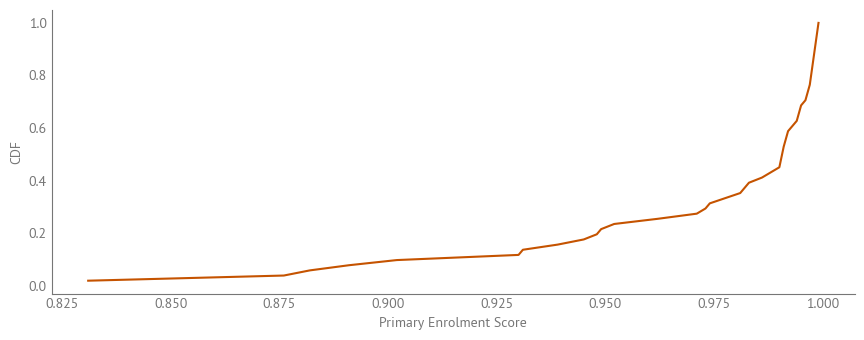

In [8]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='Primary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

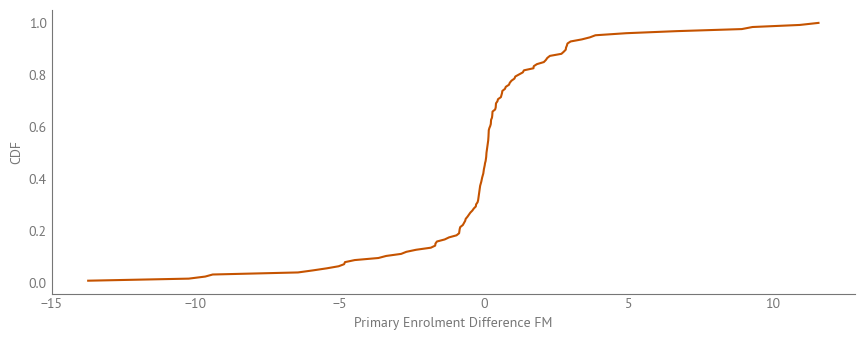

In [9]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='Primary Enrolment Difference FM', ylabel='CDF')

In [10]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
code,,,,,,,
LTU,Lithuania,241,0.999,77.0,-0.07,99.70,99.77
URY,Uruguay,363,0.999,76.0,-0.07,99.38,99.45
HUN,Hungary,201,0.999,79.0,-0.10,96.09,96.19
FIN,Finland,179,0.999,78.0,-0.10,97.97,98.07
GTM,Guatemala,193,0.999,81.0,-0.14,92.24,92.38
SGP,Singapore,317,0.999,80.0,-0.15,99.28,99.42
UZB,Uzbekistan,365,0.998,83.0,-0.16,95.96,96.12
ITA,Italy,215,0.998,82.0,-0.17,98.32,98.49
CPV,Cape Verde,137,0.998,86.0,-0.18,89.04,89.22


## Revised scores

The scores are based on ratios, not differences, so let's compute those.

In [11]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    126.000000
mean       0.978829
std        0.032808
min        0.830621
25%        0.974395
50%        0.992534
75%        0.998069
max        0.999899
Name: ratio, dtype: float64

Looks like the ratio IS the score.

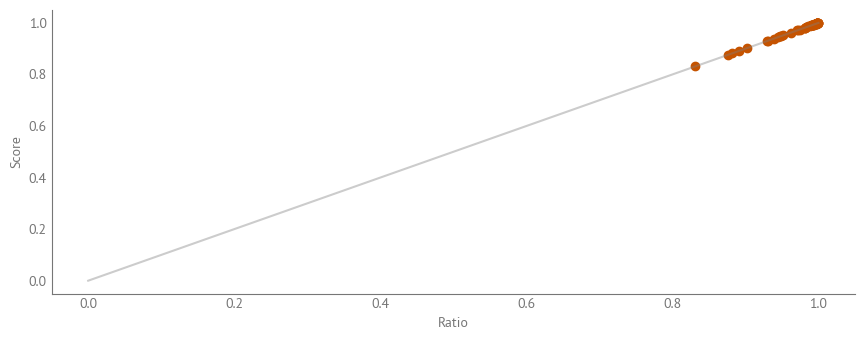

In [12]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')

So here are the revised, symmetric scores.

In [13]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    126.000000
mean       0.978829
std        0.032808
min        0.830621
25%        0.974395
50%        0.992534
75%        0.998069
max        0.999899
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

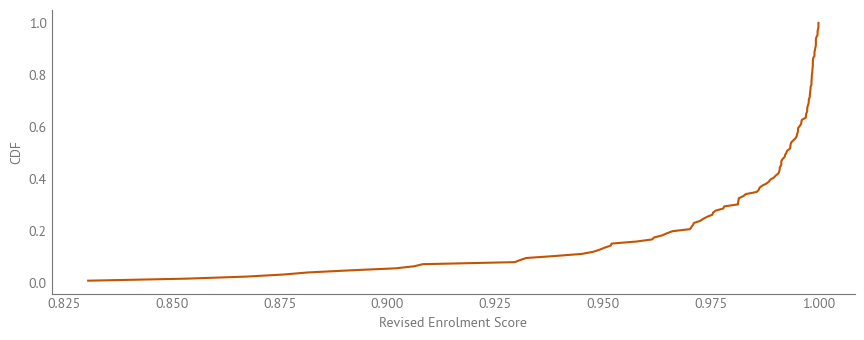

In [14]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

Here's the distribution of revised scores, compare to the original.

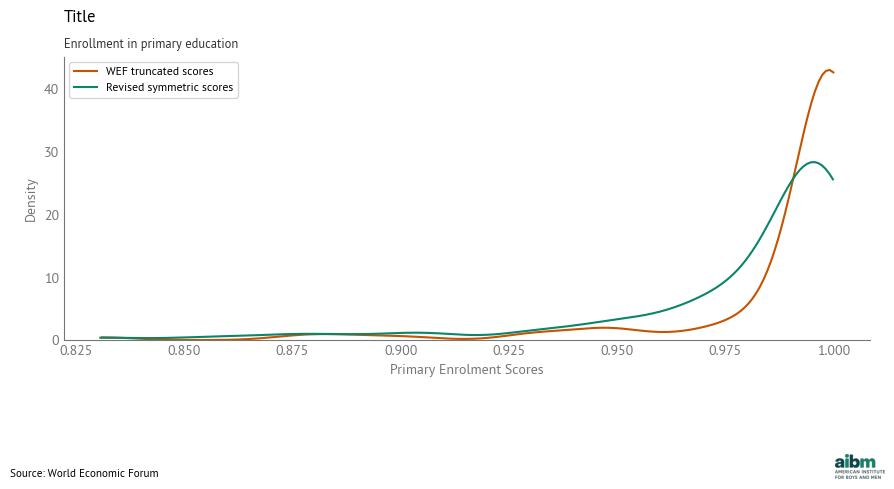

In [15]:
from utils import plot_score_distributions, add_title

plot_score_distributions(df, xlabel='Primary Enrolment Scores')
add_title("Title",
          "Enrollment in primary education")

In [16]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(75, 9)

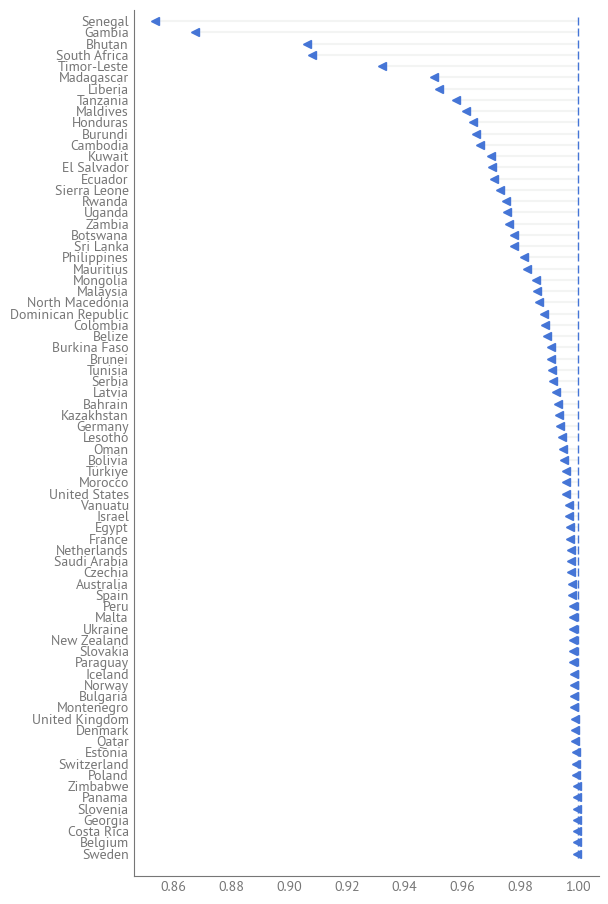

In [17]:
from utils import plot_revised_scores

plot_revised_scores(revised)

## Export the results

In [18]:
from utils import make_rank_table

table = make_rank_table(df)
table.to_csv("wef_primary_enrolment_table.csv")
table.shape

(146, 6)

In [19]:
table['score'].describe()

count    126.000000
mean       0.989111
std        0.027515
min        0.831000
25%        0.994250
50%        1.000000
75%        1.000000
max        1.000000
Name: score, dtype: float64

In [20]:
from utils import make_weight_table

make_weight_table(table, 'primary')

original             revised          
              std   inv std       std   inv std
primary  0.027515  0.363434  0.032808  0.304804

## OECD countries

In [21]:
from utils import oecd_codes

df_oecd = df.loc[oecd_codes].sort_values(by='revised_score')

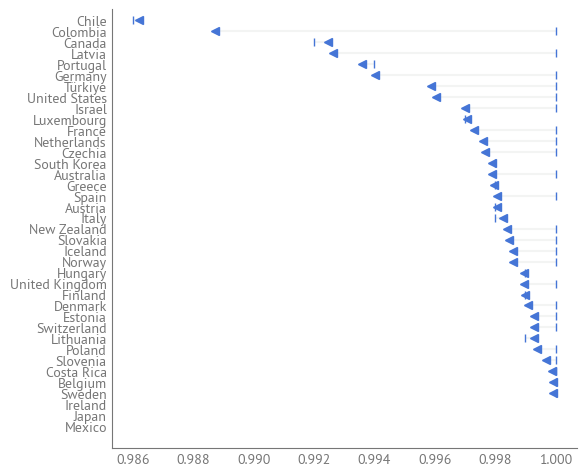

In [22]:
plot_revised_scores(df_oecd)

In [23]:
df.query("country == 'Ireland'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score,revised_rank
code,,,,,,,,,,
IRL,Ireland,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
